In [1]:
import re
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, LocallyConnected2D, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre
from keras.initializers import *
from keras.optimizers import *
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.model_selection import StratifiedKFold
import seaborn as sb
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
scaler = pre.MinMaxScaler(feature_range=(0,1))
#sb.set(rc={'figure.figsize':(10,10)})

In [3]:
header=['id', 'ccf', 'age', 'sex', 'painLocation', 'painExcertion', 'painResting', 'pncaden', 'chestPainType',
        'restingBP','hyperTension', 'cholestrol', 'smoker', 'noOfCigarette' , 'smokingYears', 'bloodSugar',
        'historyOfDiabetes', 'historyOfHA', 'restingECG', 'ekgmo', 'ekgday', 'ekgyr', 'dig',
        'prop', 'nitr', 'pro' ,'diuretic', 'proto', 'stressTestDuration', 'stressTestSTTime', 'stressTestMet',
        'stressTestMaxHR', 'stressTestRestingHR', 'stressTestMaxFirstBPS','stressTestMaxSecondBPS', 'dummy',
        'stressTestRestingBP', 'exerciseAngina', 'xhypo', 'STDepressionExercise', 'STDepressionSlope',
        'rldv5','rldv5e', 'coloredVesselsFluroscopy', 'restckm','exerckm','restef', 'restwm', 'exeref', 'exerwm',
        'heartWallDamage', 'thalsev', 'thalpul', 'earlobe', 'cmo', 'cday', 'cyr', 'output', 'lmt',
 'ladprox', 'laddist', 'diag', 'cxmain', 'ramus', 'om1', 'om2', 'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4',
 'lvf', 'cathef', 'junk', 'name']

In [4]:
columnsToDrop=['id', 'ccf', 'painExcertion', 'painResting', 'pncaden','historyOfDiabetes', 'ekgmo', 'ekgday',
               'ekgyr', 'dig', 'prop', 'nitr', 'pro' ,'diuretic', 'proto','stressTestMet', 'dummy', 'xhypo',
               'rldv5','rldv5e','restckm','exerckm','restef', 'restwm', 'exeref','exerwm', 'thalsev', 'thalpul',
               'earlobe', 'cmo', 'cday', 'cyr', 'lmt', 'ladprox', 'laddist', 'diag','cxmain', 'ramus', 'om1', 'om2',
               'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4','lvf', 'cathef', 'junk', 'name']

### Reformatting and Preprocessing the four datasets

In [5]:
with open('cleveland.data.txt', 'r', errors='replace', encoding='utf-8') as fp:
    line=fp.readlines()

In [6]:
with open('processedCleveland.txt', 'w', encoding='utf-8')as fp:
    s=""
    for l in line:
        s=s+l.strip()+" "
        if(l.split()[-1]=="name"):
            fp.write(s.strip()+"\n")
            s=""

In [7]:
clevelandData=pd.read_csv("processedCleveland.txt", delimiter=" ", error_bad_lines=False, names=header)
clevelandData=clevelandData.dropna()

In [8]:
with open('hungarian.data.txt', 'r', errors='replace', encoding='utf-8') as fp:
    line=fp.readlines()

In [9]:
with open('processedHungarian.txt','w', encoding='utf-8')as fp:
    s=""
    for l in line:
        s=s+l.strip()+" "
        if(l.split()[-1]=="name"):
            fp.write(s.strip()+"\n")
            s=""

In [10]:
hungarianData=pd.read_csv("processedHungarian.txt", delimiter=" ", error_bad_lines=False, names=header)
hungarianData=hungarianData.dropna()

In [11]:
with open('switzerland.data.txt', 'r', errors='replace', encoding='utf-8') as fp:
    line=fp.readlines()

In [12]:
with open('processedSwitzerland.txt','w', encoding='utf-8')as fp:
    s=""
    for l in line:
        s=s+l.strip()+" "
        if(l.split()[-1]=="name"):
            fp.write(s.strip()+"\n")
            s=""

In [13]:
switzerlandData=pd.read_csv("processedSwitzerland.txt", delimiter=" ", error_bad_lines=False, names=header)
switzerlandData=switzerlandData.dropna()

In [14]:
with open('long-beach-va.data.txt', 'r', errors='replace', encoding='utf-8') as fp:
    line=fp.readlines()

In [15]:
with open('processedLongBeach.txt','w', encoding='utf-8')as fp:
    s=""
    for l in line:
        s=s+l.strip()+" "
        if(l.split()[-1]=="name"):
            fp.write(s.strip()+"\n")
            s=""

In [16]:
longBeachData=pd.read_csv("processedLongBeach.txt", delimiter=" ", error_bad_lines=False, names=header)
longBeachData=longBeachData.dropna()

### Combining all the datasets

In [17]:
frames=[clevelandData,hungarianData,longBeachData,switzerlandData]
data=pd.concat(frames)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 122
Data columns (total 76 columns):
id                          900 non-null object
ccf                         900 non-null object
age                         900 non-null object
sex                         900 non-null float64
painLocation                900 non-null float64
painExcertion               900 non-null float64
painResting                 900 non-null float64
pncaden                     900 non-null float64
chestPainType               900 non-null object
restingBP                   900 non-null object
hyperTension                900 non-null object
cholestrol                  900 non-null float64
smoker                      900 non-null object
noOfCigarette               900 non-null float64
smokingYears                900 non-null float64
bloodSugar                  900 non-null float64
historyOfDiabetes           900 non-null float64
historyOfHA                 900 non-null float64
restingECG          

In [19]:
data.head()

,id,ccf,age,sex,painLocation,painExcertion,painResting,pncaden,chestPainType,restingBP,...,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
0,1,0,63,1.0,-9.0,-9.0,-9.0,-9.0,1,145,...,1.0,1.0,1.0,1,1.0,1,1,-9,-9.0,name
1,2,0,67,1.0,-9.0,-9.0,-9.0,-9.0,4,160,...,1.0,1.0,1.0,1,1.0,1,1,-9,-9.0,name
2,3,0,67,1.0,-9.0,-9.0,-9.0,-9.0,4,120,...,2.0,2.0,1.0,1,1.0,7,3,-9,-9.0,name
3,4,0,37,1.0,-9.0,-9.0,-9.0,-9.0,3,130,...,1.0,1.0,1.0,1,1.0,1,1,-9,-9.0,name
4,6,0,41,0.0,-9.0,-9.0,-9.0,-9.0,2,130,...,1.0,1.0,1.0,1,1.0,1,1,-9,-9.0,name


In [20]:
data=data.drop(columnsToDrop,axis=1)

In [21]:
data.head()

,age,sex,painLocation,chestPainType,restingBP,hyperTension,cholestrol,smoker,noOfCigarette,smokingYears,...,stressTestRestingHR,stressTestMaxFirstBPS,stressTestMaxSecondBPS,stressTestRestingBP,exerciseAngina,STDepressionExercise,STDepressionSlope,coloredVesselsFluroscopy,heartWallDamage,output
0,63,1.0,-9.0,1,145,1,233.0,-9,50.0,20.0,...,60.0,190.0,90.0,85.0,0.0,2.3,3.0,0,6.0,0.0
1,67,1.0,-9.0,4,160,1,286.0,-9,40.0,40.0,...,64.0,160.0,90.0,90.0,1.0,1.5,2.0,3,3.0,2.0
2,67,1.0,-9.0,4,120,1,229.0,-9,20.0,35.0,...,78.0,140.0,80.0,80.0,1.0,2.6,2.0,2,7.0,1.0
3,37,1.0,-9.0,3,130,0,250.0,-9,0.0,0.0,...,84.0,195.0,68.0,78.0,0.0,3.5,3.0,0,3.0,0.0
4,41,0.0,-9.0,2,130,1,204.0,-9,0.0,0.0,...,71.0,160.0,74.0,86.0,0.0,1.4,1.0,0,3.0,0.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 122
Data columns (total 26 columns):
age                         900 non-null object
sex                         900 non-null float64
painLocation                900 non-null float64
chestPainType               900 non-null object
restingBP                   900 non-null object
hyperTension                900 non-null object
cholestrol                  900 non-null float64
smoker                      900 non-null object
noOfCigarette               900 non-null float64
smokingYears                900 non-null float64
bloodSugar                  900 non-null float64
historyOfHA                 900 non-null float64
restingECG                  900 non-null float64
stressTestDuration          900 non-null float64
stressTestSTTime            900 non-null float64
stressTestMaxHR             900 non-null float64
stressTestRestingHR         900 non-null float64
stressTestMaxFirstBPS       900 non-null float64
stressTestMaxSecon

### Processing of the data

In [23]:
def processPainLocation(columns):
    if(columns[0]==-9):
        if(columns[1]>0):
            if(columns[2]==1):
                return 0
            return 1
        return 0
    return columns[0]

In [24]:
def replaceByMean(columns,mean):
    if(columns[0]<1):
        return int(mean)
    return columns[0]

In [25]:
def processHypertension(columns):
    if(columns[0]==-9):
        if(columns[1]>120):
            return 1
        return 0
    return columns[0]

In [26]:
def processCholestrol(columns):
    if(columns[0]<=200):
        return 0
    elif(columns[0]<=239):
        return 1
    else:
        return 2

In [27]:
def processSmoking(columns):
    if(columns[0]==-9):
        if(int(columns[1])>0):
            return 1
        elif(int(columns[1])==0):
            return 0
        if(int(columns[2])>0):
            return 1
        elif(int(columns[2])==0):
            return 0
    return int(columns[0])

In [28]:
def addDummyCategory(columns):
    if(columns[0]==-9):
        return -1
    return columns[0]

In [29]:
def processRestingECG(columns):
    if(columns[0]==2):
        return 1
    return columns[0]

In [30]:
def processstressTestSTTime(columns):
    if(columns[0]==-9):
        return -1
    return columns[0]

In [31]:
def processExerciseAgnia(columns):
    if(columns[0]==-9):
        if(columns[1]==1):
            return 1
        return 0
    return columns[0]

In [32]:
def processSTDepressionSlope(columns):
    if(columns[0]<1):
        return -1
    if(columns[0]==1):
        return 1
    if(columns[0]==2):
        return 0
    if(columns[0]==3):
        return 2
    return columns[0]

In [33]:
def processcoloredVesselsFluroscopy(columns):
    if(columns[0]==-9 or columns[0]==9):
        return -1
    return columns[0]

In [34]:
def processHeartWallDamage(columns):
    if(columns[0]==-9):
        return -1
    if(columns[0]<=3):
        return 0
    if(columns[0]<=6):
        return 2
    if(columns[0]==7):
        return 1

In [35]:
def processOutput(columns):
    if(columns[0]>1):
        return 1
    return 0

In [36]:
data = data.sample(frac=1).reset_index(drop=True)

In [37]:
data['age']=pd.to_numeric(data['age'])
d=data[data.age !=-9]
d=d[d.age != 0]
mean=d['age'].mean()
mean=data['age'].mean()
data['age']=data[['age']].apply(replaceByMean,args=(mean,),axis=1)

In [38]:
data['sex']=pd.to_numeric(data['sex'])

In [39]:
data['painLocation']=data[['painLocation','output','bloodSugar']].apply(processPainLocation,axis=1)

In [40]:
data['chestPainType']=pd.to_numeric(data['chestPainType'])

In [41]:
dummyList = pd.get_dummies(data['chestPainType'], prefix='chestPainType')
data=data.drop('chestPainType',axis=1)
data=data.join(dummyList)

In [42]:
data['restingBP']=pd.to_numeric(data['restingBP'])
d=data[data.restingBP !=-9]
d=d[d.restingBP != 0]
mean=d['restingBP'].mean()
data['restingBP']=data[['restingBP']].apply(replaceByMean,args=(mean,),axis=1)

In [43]:
data['hyperTension']=pd.to_numeric(data['hyperTension'])
data['hyperTension']=data[['hyperTension','restingBP']].apply(processHypertension,axis=1)

In [44]:
data['cholestrol']=pd.to_numeric(data['cholestrol'])
d=data[data.cholestrol !=-9]
d=d[d.cholestrol != 0]
mean=d['cholestrol'].mean()
data['cholestrol']=data[['cholestrol']].apply(replaceByMean,args=(mean,),axis=1)

In [45]:
data['cholestrol']=data[['cholestrol']].apply(processCholestrol,axis=1)

In [46]:
dummyList = pd.get_dummies(data['cholestrol'], prefix='cholestrol')
data=data.join(dummyList)
data=data.drop('cholestrol',axis=1)

In [47]:
data['smoker']=pd.to_numeric(data['smoker'])
data['smoker']=data[['smoker','smokingYears','noOfCigarette']].apply(processSmoking,axis=1)

In [48]:
data['smoker']=data[['smoker']].apply(addDummyCategory,axis=1)

In [49]:
dummyList = pd.get_dummies(data['smoker'], prefix='smoker')
data=data.join(dummyList)
data=data.drop('smoker',axis=1)

In [50]:
data['bloodSugar']=pd.to_numeric(data['bloodSugar'])
data['bloodSugar']=data[['bloodSugar']].apply(addDummyCategory,axis=1)

In [51]:
data.at[data[data.bloodSugar==40].index[0],'bloodSugar']=int(-1)

In [52]:
dummyList = pd.get_dummies(data['bloodSugar'], prefix='bloodSugar')
data=data.join(dummyList)
data=data.drop('bloodSugar',axis=1)

In [53]:
data['historyOfHA']=pd.to_numeric(data['historyOfHA'])
data['historyOfHA']=data[['historyOfHA']].apply(addDummyCategory,axis=1)

In [54]:
dummyList = pd.get_dummies(data['historyOfHA'], prefix='historyOfHA')
data=data.join(dummyList)
data=data.drop('historyOfHA',axis=1)

In [55]:
data['restingECG']=pd.to_numeric(data['restingECG'])

In [56]:
data.at[data[data.restingECG==-9].index[0],'restingECG']=int(0)
data.at[data[data.restingECG==-9].index[0],'restingECG']=int(0)
data.at[data[data.restingECG==0.4].index[0],'restingECG']=int(0)

In [57]:
dummyList = pd.get_dummies(data['restingECG'], prefix='restingECG')
data=data.join(dummyList)
data=data.drop('restingECG',axis=1)

In [58]:
#data['restingECG']=data[['restingECG']].apply(processRestingECG,axis=1)

In [59]:
data['stressTestDuration']=pd.to_numeric(data['stressTestDuration'])
data['stressTestDuration']=data[['stressTestDuration']].apply(replaceByMean,args=(mean,),axis=1)

In [60]:
data['stressTestSTTime']=pd.to_numeric(data['stressTestSTTime'])
data['stressTestSTTime']=data[['stressTestSTTime']].apply(addDummyCategory,axis=1)

In [61]:
data['stressTestMaxHR']=pd.to_numeric(data['stressTestMaxHR'])
d=data[data.stressTestMaxHR !=-9]
mean=d['stressTestMaxHR'].mean()
data['stressTestMaxHR']=data[['stressTestMaxHR']].apply(replaceByMean,args=(mean,),axis=1)
data.at[data[data.stressTestMaxHR==8105].index[0],'stressTestMaxHR']=int(mean)

In [62]:
data['stressTestRestingHR']=pd.to_numeric(data['stressTestRestingHR'])
d=data[data.stressTestRestingHR !=-9]
mean=d['stressTestRestingHR'].mean()
data['stressTestRestingHR']=data[['stressTestRestingHR']].apply(replaceByMean,args=(mean,),axis=1)
data.at[data[data.stressTestRestingHR==1.0].index[0],'stressTestRestingHR']=int(mean)
data.at[data[data.stressTestRestingHR==37.0].index[0],'stressTestRestingHR']=int(mean)
data.at[data[data.stressTestRestingHR==39.0].index[0],'stressTestRestingHR']=int(mean)

In [63]:
data['stressTestMaxFirstBPS']=pd.to_numeric(data['stressTestMaxFirstBPS'])
d=data[data.stressTestMaxFirstBPS !=-9]
mean=d['stressTestMaxFirstBPS'].mean()
data['stressTestMaxFirstBPS']=data[['stressTestMaxFirstBPS']].apply(replaceByMean,args=(mean,),axis=1)

In [64]:
data['stressTestMaxSecondBPS']=pd.to_numeric(data['stressTestMaxSecondBPS'])
d=data[data.stressTestMaxSecondBPS !=-9]
mean=d['stressTestMaxSecondBPS'].mean()
data['stressTestMaxSecondBPS']=data[['stressTestMaxSecondBPS']].apply(replaceByMean,args=(mean,),axis=1)
data.at[data[data.stressTestMaxSecondBPS==1.0].index[0],'stressTestMaxSecondBPS']=int(mean)
data.at[data[data.stressTestMaxSecondBPS==11.0].index[0],'stressTestMaxSecondBPS']=int(mean)
data.at[data[data.stressTestMaxSecondBPS==26.0].index[0],'stressTestMaxSecondBPS']=int(mean)

In [65]:
data['stressTestRestingBP']=pd.to_numeric(data['stressTestRestingBP'])
d=data[data.stressTestRestingBP !=-9]
mean=d['stressTestRestingBP'].mean()
data['stressTestRestingBP']=data[['stressTestRestingBP']].apply(replaceByMean,args=(mean,),axis=1)
data.at[data[data.stressTestRestingBP==1018].index[0],'stressTestRestingBP']=int(mean)

In [66]:
data['exerciseAngina']=pd.to_numeric(data['exerciseAngina'])
data['exerciseAngina']=data[['exerciseAngina','painLocation']].apply(processExerciseAgnia,axis=1)
data.at[data[data.exerciseAngina==101881].index[0],'exerciseAngina']=int(1)

In [67]:
data['STDepressionExercise']=pd.to_numeric(data['STDepressionExercise'])
d=data[data.STDepressionExercise !=-9]
mean=d['STDepressionExercise'].mean()
data['STDepressionExercise']=data[['STDepressionExercise']].apply(replaceByMean,args=(mean,),axis=1)

In [68]:
data['STDepressionSlope']=pd.to_numeric(data['STDepressionSlope'])
data['STDepressionSlope']=data[['STDepressionSlope']].apply(processSTDepressionSlope,axis=1)

In [69]:
dummyList = pd.get_dummies(data['STDepressionSlope'], prefix='STDepressionSlope')
data=data.join(dummyList)
data=data.drop('STDepressionSlope',axis=1)

In [70]:
data['coloredVesselsFluroscopy']=pd.to_numeric(data['coloredVesselsFluroscopy'])
data['coloredVesselsFluroscopy']=data[['coloredVesselsFluroscopy']].apply(processcoloredVesselsFluroscopy,axis=1)

In [71]:
dummyList = pd.get_dummies(data['coloredVesselsFluroscopy'], prefix='coloredVesselsFluroscopy')
data=data.join(dummyList)
data=data.drop('coloredVesselsFluroscopy',axis=1)

In [72]:
data['heartWallDamage']=pd.to_numeric(data['heartWallDamage'])
data['heartWallDamage']=data[['heartWallDamage']].apply(processHeartWallDamage,axis=1)

In [73]:
dummyList = pd.get_dummies(data['heartWallDamage'], prefix='heartWallDamage')
data=data.join(dummyList)
data=data.drop('heartWallDamage',axis=1)

In [74]:
data['output']=pd.to_numeric(data['output'])
data['output']=data[['output']].apply(processOutput,axis=1)

In [75]:
dataOutput=pd.DataFrame(data['output'])

In [76]:
dataOutput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 1 columns):
output    900 non-null int64
dtypes: int64(1)
memory usage: 7.1 KB


In [77]:
data=data.drop(['noOfCigarette' , 'smokingYears'],axis=1)

In [78]:
data=data.drop(['output'],axis=1)

In [79]:
pd.set_option('display.max_columns', None)
data.head()

,age,sex,painLocation,restingBP,hyperTension,stressTestDuration,stressTestSTTime,stressTestMaxHR,stressTestRestingHR,stressTestMaxFirstBPS,stressTestMaxSecondBPS,stressTestRestingBP,exerciseAngina,STDepressionExercise,chestPainType_1,chestPainType_2,chestPainType_3,chestPainType_4,cholestrol_0,cholestrol_1,cholestrol_2,smoker_-1,smoker_0,smoker_1,bloodSugar_-1.0,bloodSugar_0.0,bloodSugar_1.0,historyOfHA_-1.0,historyOfHA_0.0,historyOfHA_1.0,restingECG_0.0,restingECG_1.0,restingECG_2.0,STDepressionSlope_-1,STDepressionSlope_0,STDepressionSlope_1,STDepressionSlope_2,coloredVesselsFluroscopy_-1,coloredVesselsFluroscopy_0,coloredVesselsFluroscopy_1,coloredVesselsFluroscopy_2,coloredVesselsFluroscopy_3,heartWallDamage_-1,heartWallDamage_0,heartWallDamage_1,heartWallDamage_2
0,72,1.0,1.0,120,1,9.0,-1.0,102.0,58.0,190.0,96.0,80.0,1.0,1.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,54,1.0,0.0,120,0,13.0,10.0,137.0,68.0,182.0,110.0,82.0,0.0,2.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
2,54,1.0,0.0,150,0,9.5,9.0,165.0,56.0,170.0,95.0,100.0,0.0,1.6,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
3,65,1.0,1.0,135,1,9.0,6.0,127.0,59.0,170.0,75.0,70.0,0.0,2.8,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
4,58,1.0,1.0,128,1,4.0,3.0,130.0,56.0,165.0,100.0,90.0,1.0,3.0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0


In [80]:
#data=data.drop(['smoker_-1','bloodSugar_-1.0','historyOfHA_-1.0','STDepressionSlope_-1',
#               'coloredVesselsFluroscopy_-1','heartWallDamage_-1'],axis=1)

In [81]:
pd.set_option('display.max_columns', None)
data.head()

,age,sex,painLocation,restingBP,hyperTension,stressTestDuration,stressTestSTTime,stressTestMaxHR,stressTestRestingHR,stressTestMaxFirstBPS,stressTestMaxSecondBPS,stressTestRestingBP,exerciseAngina,STDepressionExercise,chestPainType_1,chestPainType_2,chestPainType_3,chestPainType_4,cholestrol_0,cholestrol_1,cholestrol_2,smoker_-1,smoker_0,smoker_1,bloodSugar_-1.0,bloodSugar_0.0,bloodSugar_1.0,historyOfHA_-1.0,historyOfHA_0.0,historyOfHA_1.0,restingECG_0.0,restingECG_1.0,restingECG_2.0,STDepressionSlope_-1,STDepressionSlope_0,STDepressionSlope_1,STDepressionSlope_2,coloredVesselsFluroscopy_-1,coloredVesselsFluroscopy_0,coloredVesselsFluroscopy_1,coloredVesselsFluroscopy_2,coloredVesselsFluroscopy_3,heartWallDamage_-1,heartWallDamage_0,heartWallDamage_1,heartWallDamage_2
0,72,1.0,1.0,120,1,9.0,-1.0,102.0,58.0,190.0,96.0,80.0,1.0,1.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,54,1.0,0.0,120,0,13.0,10.0,137.0,68.0,182.0,110.0,82.0,0.0,2.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
2,54,1.0,0.0,150,0,9.5,9.0,165.0,56.0,170.0,95.0,100.0,0.0,1.6,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
3,65,1.0,1.0,135,1,9.0,6.0,127.0,59.0,170.0,75.0,70.0,0.0,2.8,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
4,58,1.0,1.0,128,1,4.0,3.0,130.0,56.0,165.0,100.0,90.0,1.0,3.0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 46 columns):
age                            900 non-null int64
sex                            900 non-null float64
painLocation                   900 non-null float64
restingBP                      900 non-null int64
hyperTension                   900 non-null int64
stressTestDuration             900 non-null float64
stressTestSTTime               900 non-null float64
stressTestMaxHR                900 non-null float64
stressTestRestingHR            900 non-null float64
stressTestMaxFirstBPS          900 non-null float64
stressTestMaxSecondBPS         900 non-null float64
stressTestRestingBP            900 non-null float64
exerciseAngina                 900 non-null float64
STDepressionExercise           900 non-null float64
chestPainType_1                900 non-null uint8
chestPainType_2                900 non-null uint8
chestPainType_3                900 non-null uint8
chestPainType_4        

### Training of the model

In [83]:
trainingData_X, testingData_X, trainingData_Y, testingData_Y = train_test_split(data,
                                                                                dataOutput,
                                                                                test_size = 0.2,
                                                                                random_state=5)

In [84]:
x_train=trainingData_X.values

sacler=scaler.fit(x_train)
x_train=scaler.transform(x_train)

In [85]:
x_test=testingData_X.values

sacler=scaler.fit(x_test)
x_test=scaler.transform(x_test)

In [86]:
y_train=trainingData_Y.values
y_test=testingData_Y.values

In [87]:
x_train=x_train.astype('float32')
y_train=y_train.astype('float32')
x_test=x_test.astype('float32')
y_test=y_test.astype('float32')

In [88]:
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)

In [89]:
firstLayer=x_train.shape[1]
secondLayer=int(x_train.shape[1]/2)
thirdLayer=int(secondLayer/2)
fourthLayer=y_train.shape[1]

In [90]:
print(firstLayer," ",secondLayer," ",thirdLayer," ",fourthLayer)

46   23   11   1


In [91]:
model=Sequential()
model.add(Dense(firstLayer, input_dim=x_train.shape[1], activation='tanh',
                kernel_initializer=glorot_uniform(seed=None),
                bias_initializer=Constant(value=0)))
model.add(Dropout(0.2))
model.add(Dense(secondLayer,activation='relu',
                kernel_initializer=glorot_uniform(seed=None),
                bias_initializer=Constant(value=0),
               kernel_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.4))
model.add(Dense(fourthLayer, activation='sigmoid',kernel_initializer=glorot_uniform(seed=None),
                bias_initializer=Constant(value=0)))

In [92]:
model.compile(loss='mse', optimizer=RMSprop(lr=0.0002),metrics=['accuracy'])

In [93]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 46)                2162      
_________________________________________________________________
dropout_1 (Dropout)          (None, 46)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 23)                1081      
_________________________________________________________________
dropout_2 (Dropout)          (None, 23)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 24        
Total params: 3,267
Trainable params: 3,267
Non-trainable params: 0
_________________________________________________________________


In [94]:
history=model.fit(x_train, y_train, validation_split=0.1, epochs=1000,batch_size=16)

Train on 648 samples, validate on 72 samples
Epoch 1/1000
648/648 [==============================] - 0s 248us/step - loss: 1.7710 - acc: 0.4676 - val_loss: 1.7045 - val_acc: 0.5139
Epoch 2/1000
648/648 [==============================] - 0s 98us/step - loss: 1.6567 - acc: 0.5679 - val_loss: 1.6113 - val_acc: 0.6528
Epoch 3/1000
648/648 [==============================] - 0s 107us/step - loss: 1.5747 - acc: 0.6188 - val_loss: 1.5303 - val_acc: 0.6528
Epoch 4/1000
648/648 [==============================] - 0s 129us/step - loss: 1.4968 - acc: 0.6358 - val_loss: 1.4539 - val_acc: 0.6389
Epoch 5/1000
648/648 [==============================] - 0s 123us/step - loss: 1.4214 - acc: 0.6528 - val_loss: 1.3816 - val_acc: 0.5972
Epoch 6/1000
648/648 [==============================] - 0s 124us/step - loss: 1.3518 - acc: 0.6605 - val_loss: 1.3134 - val_acc: 0.5972
Epoch 7/1000
648/648 [==============================] - 0s 116us/step - loss: 1.2806 - acc: 0.6713 - val_loss: 1.2479 - val_acc: 0.6389
Epoc

Epoch 61/1000
648/648 [==============================] - 0s 81us/step - loss: 0.2084 - acc: 0.7130 - val_loss: 0.2239 - val_acc: 0.6667
Epoch 62/1000
648/648 [==============================] - 0s 83us/step - loss: 0.2133 - acc: 0.7191 - val_loss: 0.2233 - val_acc: 0.6667
Epoch 63/1000
648/648 [==============================] - 0s 106us/step - loss: 0.2080 - acc: 0.7500 - val_loss: 0.2224 - val_acc: 0.6667
Epoch 64/1000
648/648 [==============================] - 0s 93us/step - loss: 0.2101 - acc: 0.7191 - val_loss: 0.2226 - val_acc: 0.6528
Epoch 65/1000
648/648 [==============================] - 0s 87us/step - loss: 0.2110 - acc: 0.7207 - val_loss: 0.2221 - val_acc: 0.6528
Epoch 66/1000
648/648 [==============================] - 0s 89us/step - loss: 0.2094 - acc: 0.7238 - val_loss: 0.2227 - val_acc: 0.6806
Epoch 67/1000
648/648 [==============================] - 0s 91us/step - loss: 0.2070 - acc: 0.7407 - val_loss: 0.2220 - val_acc: 0.6806
Epoch 68/1000
648/648 [========================

648/648 [==============================] - 0s 94us/step - loss: 0.1883 - acc: 0.7593 - val_loss: 0.2098 - val_acc: 0.7083
Epoch 122/1000
648/648 [==============================] - 0s 95us/step - loss: 0.1872 - acc: 0.7716 - val_loss: 0.2090 - val_acc: 0.6806
Epoch 123/1000
648/648 [==============================] - 0s 94us/step - loss: 0.1877 - acc: 0.7593 - val_loss: 0.2081 - val_acc: 0.7222
Epoch 124/1000
648/648 [==============================] - 0s 94us/step - loss: 0.1859 - acc: 0.7639 - val_loss: 0.2083 - val_acc: 0.6944
Epoch 125/1000
648/648 [==============================] - 0s 94us/step - loss: 0.1903 - acc: 0.7485 - val_loss: 0.2080 - val_acc: 0.7222
Epoch 126/1000
648/648 [==============================] - 0s 88us/step - loss: 0.1904 - acc: 0.7423 - val_loss: 0.2070 - val_acc: 0.7222
Epoch 127/1000
648/648 [==============================] - 0s 89us/step - loss: 0.1905 - acc: 0.7500 - val_loss: 0.2071 - val_acc: 0.7222
Epoch 128/1000
648/648 [==============================] 

Epoch 181/1000
648/648 [==============================] - 0s 109us/step - loss: 0.1801 - acc: 0.7685 - val_loss: 0.2041 - val_acc: 0.6944
Epoch 182/1000
648/648 [==============================] - 0s 91us/step - loss: 0.1836 - acc: 0.7593 - val_loss: 0.2053 - val_acc: 0.6944
Epoch 183/1000
648/648 [==============================] - 0s 91us/step - loss: 0.1784 - acc: 0.7731 - val_loss: 0.2049 - val_acc: 0.7083
Epoch 184/1000
648/648 [==============================] - 0s 69us/step - loss: 0.1740 - acc: 0.7793 - val_loss: 0.2055 - val_acc: 0.6944
Epoch 185/1000
648/648 [==============================] - 0s 71us/step - loss: 0.1804 - acc: 0.7546 - val_loss: 0.2050 - val_acc: 0.6806
Epoch 186/1000
648/648 [==============================] - 0s 69us/step - loss: 0.1728 - acc: 0.7840 - val_loss: 0.2071 - val_acc: 0.6806
Epoch 187/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1776 - acc: 0.7701 - val_loss: 0.2057 - val_acc: 0.6944
Epoch 188/1000
648/648 [================

Epoch 241/1000
648/648 [==============================] - 0s 65us/step - loss: 0.1718 - acc: 0.7978 - val_loss: 0.2048 - val_acc: 0.6667
Epoch 242/1000
648/648 [==============================] - 0s 61us/step - loss: 0.1768 - acc: 0.7701 - val_loss: 0.2037 - val_acc: 0.6667
Epoch 243/1000
648/648 [==============================] - 0s 60us/step - loss: 0.1700 - acc: 0.7840 - val_loss: 0.2047 - val_acc: 0.6667
Epoch 244/1000
648/648 [==============================] - 0s 60us/step - loss: 0.1729 - acc: 0.7778 - val_loss: 0.2045 - val_acc: 0.6667
Epoch 245/1000
648/648 [==============================] - 0s 61us/step - loss: 0.1725 - acc: 0.7994 - val_loss: 0.2043 - val_acc: 0.6806
Epoch 246/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1687 - acc: 0.7824 - val_loss: 0.2059 - val_acc: 0.6667
Epoch 247/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1799 - acc: 0.7608 - val_loss: 0.2032 - val_acc: 0.6806
Epoch 248/1000
648/648 [=================

Epoch 301/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1696 - acc: 0.7809 - val_loss: 0.2054 - val_acc: 0.6528
Epoch 302/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1714 - acc: 0.7855 - val_loss: 0.2032 - val_acc: 0.6667
Epoch 303/1000
648/648 [==============================] - 0s 65us/step - loss: 0.1736 - acc: 0.7809 - val_loss: 0.2033 - val_acc: 0.6667
Epoch 304/1000
648/648 [==============================] - 0s 88us/step - loss: 0.1697 - acc: 0.7901 - val_loss: 0.2029 - val_acc: 0.6667
Epoch 305/1000
648/648 [==============================] - 0s 70us/step - loss: 0.1642 - acc: 0.7886 - val_loss: 0.2048 - val_acc: 0.6667
Epoch 306/1000
648/648 [==============================] - 0s 65us/step - loss: 0.1719 - acc: 0.7978 - val_loss: 0.2049 - val_acc: 0.6667
Epoch 307/1000
648/648 [==============================] - 0s 66us/step - loss: 0.1702 - acc: 0.7994 - val_loss: 0.2055 - val_acc: 0.6528
Epoch 308/1000
648/648 [=================

Epoch 361/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1695 - acc: 0.7778 - val_loss: 0.2019 - val_acc: 0.6667
Epoch 362/1000
648/648 [==============================] - 0s 68us/step - loss: 0.1638 - acc: 0.7948 - val_loss: 0.2036 - val_acc: 0.6667
Epoch 363/1000
648/648 [==============================] - 0s 88us/step - loss: 0.1669 - acc: 0.7855 - val_loss: 0.2033 - val_acc: 0.6528
Epoch 364/1000
648/648 [==============================] - 0s 105us/step - loss: 0.1663 - acc: 0.7901 - val_loss: 0.2039 - val_acc: 0.6806
Epoch 365/1000
648/648 [==============================] - 0s 85us/step - loss: 0.1678 - acc: 0.7778 - val_loss: 0.2019 - val_acc: 0.6806
Epoch 366/1000
648/648 [==============================] - 0s 85us/step - loss: 0.1644 - acc: 0.7963 - val_loss: 0.2041 - val_acc: 0.6528
Epoch 367/1000
648/648 [==============================] - 0s 65us/step - loss: 0.1698 - acc: 0.7778 - val_loss: 0.2041 - val_acc: 0.6528
Epoch 368/1000
648/648 [================

648/648 [==============================] - 0s 75us/step - loss: 0.1649 - acc: 0.8102 - val_loss: 0.2033 - val_acc: 0.6667
Epoch 421/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1663 - acc: 0.7901 - val_loss: 0.2034 - val_acc: 0.6667
Epoch 422/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1647 - acc: 0.8025 - val_loss: 0.2032 - val_acc: 0.6528
Epoch 423/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1644 - acc: 0.7917 - val_loss: 0.2035 - val_acc: 0.6528
Epoch 424/1000
648/648 [==============================] - 0s 62us/step - loss: 0.1654 - acc: 0.7963 - val_loss: 0.2027 - val_acc: 0.6667
Epoch 425/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1647 - acc: 0.7855 - val_loss: 0.2022 - val_acc: 0.6667
Epoch 426/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1668 - acc: 0.7778 - val_loss: 0.2013 - val_acc: 0.6528
Epoch 427/1000
648/648 [==============================] 

Epoch 480/1000
648/648 [==============================] - 0s 71us/step - loss: 0.1576 - acc: 0.8071 - val_loss: 0.2010 - val_acc: 0.6667
Epoch 481/1000
648/648 [==============================] - 0s 72us/step - loss: 0.1644 - acc: 0.8025 - val_loss: 0.2031 - val_acc: 0.6667
Epoch 482/1000
648/648 [==============================] - 0s 67us/step - loss: 0.1633 - acc: 0.8009 - val_loss: 0.2020 - val_acc: 0.6667
Epoch 483/1000
648/648 [==============================] - 0s 60us/step - loss: 0.1634 - acc: 0.7840 - val_loss: 0.2017 - val_acc: 0.6806
Epoch 484/1000
648/648 [==============================] - 0s 61us/step - loss: 0.1601 - acc: 0.7886 - val_loss: 0.2002 - val_acc: 0.6667
Epoch 485/1000
648/648 [==============================] - 0s 60us/step - loss: 0.1627 - acc: 0.7948 - val_loss: 0.2019 - val_acc: 0.6667
Epoch 486/1000
648/648 [==============================] - 0s 67us/step - loss: 0.1604 - acc: 0.7994 - val_loss: 0.2005 - val_acc: 0.6667
Epoch 487/1000
648/648 [=================

Epoch 540/1000
648/648 [==============================] - 0s 68us/step - loss: 0.1601 - acc: 0.7994 - val_loss: 0.2016 - val_acc: 0.6667
Epoch 541/1000
648/648 [==============================] - 0s 78us/step - loss: 0.1602 - acc: 0.8164 - val_loss: 0.2012 - val_acc: 0.6667
Epoch 542/1000
648/648 [==============================] - 0s 68us/step - loss: 0.1644 - acc: 0.7948 - val_loss: 0.2011 - val_acc: 0.7083
Epoch 543/1000
648/648 [==============================] - 0s 67us/step - loss: 0.1603 - acc: 0.7963 - val_loss: 0.2008 - val_acc: 0.6806
Epoch 544/1000
648/648 [==============================] - 0s 67us/step - loss: 0.1590 - acc: 0.8056 - val_loss: 0.2024 - val_acc: 0.6667
Epoch 545/1000
648/648 [==============================] - 0s 67us/step - loss: 0.1636 - acc: 0.8071 - val_loss: 0.2021 - val_acc: 0.6667
Epoch 546/1000
648/648 [==============================] - 0s 65us/step - loss: 0.1619 - acc: 0.7978 - val_loss: 0.1985 - val_acc: 0.7083
Epoch 547/1000
648/648 [=================

Epoch 600/1000
648/648 [==============================] - 0s 73us/step - loss: 0.1585 - acc: 0.8117 - val_loss: 0.2021 - val_acc: 0.7083
Epoch 601/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1547 - acc: 0.7948 - val_loss: 0.2014 - val_acc: 0.6806
Epoch 602/1000
648/648 [==============================] - 0s 62us/step - loss: 0.1604 - acc: 0.8025 - val_loss: 0.2028 - val_acc: 0.6806
Epoch 603/1000
648/648 [==============================] - 0s 74us/step - loss: 0.1567 - acc: 0.8056 - val_loss: 0.2012 - val_acc: 0.6806
Epoch 604/1000
648/648 [==============================] - 0s 65us/step - loss: 0.1496 - acc: 0.8009 - val_loss: 0.2019 - val_acc: 0.6806
Epoch 605/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1554 - acc: 0.8086 - val_loss: 0.2008 - val_acc: 0.6944
Epoch 606/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1576 - acc: 0.7994 - val_loss: 0.2000 - val_acc: 0.6806
Epoch 607/1000
648/648 [=================

Epoch 660/1000
648/648 [==============================] - 0s 73us/step - loss: 0.1561 - acc: 0.8009 - val_loss: 0.2077 - val_acc: 0.6667
Epoch 661/1000
648/648 [==============================] - 0s 62us/step - loss: 0.1589 - acc: 0.7994 - val_loss: 0.2021 - val_acc: 0.6806
Epoch 662/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1574 - acc: 0.8117 - val_loss: 0.2017 - val_acc: 0.6944
Epoch 663/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1539 - acc: 0.8148 - val_loss: 0.2034 - val_acc: 0.6806
Epoch 664/1000
648/648 [==============================] - 0s 66us/step - loss: 0.1583 - acc: 0.7948 - val_loss: 0.2003 - val_acc: 0.6944
Epoch 665/1000
648/648 [==============================] - 0s 65us/step - loss: 0.1552 - acc: 0.8179 - val_loss: 0.2009 - val_acc: 0.6806
Epoch 666/1000
648/648 [==============================] - 0s 68us/step - loss: 0.1554 - acc: 0.8102 - val_loss: 0.2021 - val_acc: 0.6667
Epoch 667/1000
648/648 [=================

Epoch 720/1000
648/648 [==============================] - 0s 65us/step - loss: 0.1513 - acc: 0.8164 - val_loss: 0.1988 - val_acc: 0.6944
Epoch 721/1000
648/648 [==============================] - 0s 69us/step - loss: 0.1521 - acc: 0.8071 - val_loss: 0.2007 - val_acc: 0.6944
Epoch 722/1000
648/648 [==============================] - 0s 78us/step - loss: 0.1526 - acc: 0.8056 - val_loss: 0.2031 - val_acc: 0.6667
Epoch 723/1000
648/648 [==============================] - 0s 90us/step - loss: 0.1536 - acc: 0.8009 - val_loss: 0.2044 - val_acc: 0.6806
Epoch 724/1000
648/648 [==============================] - 0s 86us/step - loss: 0.1530 - acc: 0.7994 - val_loss: 0.2019 - val_acc: 0.6667
Epoch 725/1000
648/648 [==============================] - 0s 85us/step - loss: 0.1575 - acc: 0.8117 - val_loss: 0.1988 - val_acc: 0.6944
Epoch 726/1000
648/648 [==============================] - 0s 81us/step - loss: 0.1561 - acc: 0.8040 - val_loss: 0.2011 - val_acc: 0.6944
Epoch 727/1000
648/648 [=================

Epoch 780/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1553 - acc: 0.7917 - val_loss: 0.2019 - val_acc: 0.6944
Epoch 781/1000
648/648 [==============================] - 0s 62us/step - loss: 0.1533 - acc: 0.8133 - val_loss: 0.1985 - val_acc: 0.6944
Epoch 782/1000
648/648 [==============================] - 0s 67us/step - loss: 0.1541 - acc: 0.8040 - val_loss: 0.1982 - val_acc: 0.7083
Epoch 783/1000
648/648 [==============================] - 0s 72us/step - loss: 0.1536 - acc: 0.8102 - val_loss: 0.2009 - val_acc: 0.6944
Epoch 784/1000
648/648 [==============================] - 0s 72us/step - loss: 0.1550 - acc: 0.8102 - val_loss: 0.2002 - val_acc: 0.6944
Epoch 785/1000
648/648 [==============================] - 0s 76us/step - loss: 0.1487 - acc: 0.8225 - val_loss: 0.2023 - val_acc: 0.6806
Epoch 786/1000
648/648 [==============================] - 0s 83us/step - loss: 0.1535 - acc: 0.8117 - val_loss: 0.2000 - val_acc: 0.6944
Epoch 787/1000
648/648 [=================

Epoch 840/1000
648/648 [==============================] - 0s 59us/step - loss: 0.1520 - acc: 0.8117 - val_loss: 0.2004 - val_acc: 0.6944
Epoch 841/1000
648/648 [==============================] - 0s 60us/step - loss: 0.1522 - acc: 0.8025 - val_loss: 0.2028 - val_acc: 0.6806
Epoch 842/1000
648/648 [==============================] - 0s 60us/step - loss: 0.1472 - acc: 0.8164 - val_loss: 0.2008 - val_acc: 0.6667
Epoch 843/1000
648/648 [==============================] - 0s 61us/step - loss: 0.1551 - acc: 0.8102 - val_loss: 0.2006 - val_acc: 0.6944
Epoch 844/1000
648/648 [==============================] - 0s 60us/step - loss: 0.1573 - acc: 0.7978 - val_loss: 0.2002 - val_acc: 0.6944
Epoch 845/1000
648/648 [==============================] - 0s 60us/step - loss: 0.1509 - acc: 0.8194 - val_loss: 0.2002 - val_acc: 0.6944
Epoch 846/1000
648/648 [==============================] - 0s 65us/step - loss: 0.1507 - acc: 0.8102 - val_loss: 0.2006 - val_acc: 0.6944
Epoch 847/1000
648/648 [=================

Epoch 900/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1518 - acc: 0.8102 - val_loss: 0.2021 - val_acc: 0.6944
Epoch 901/1000
648/648 [==============================] - 0s 77us/step - loss: 0.1498 - acc: 0.8148 - val_loss: 0.2029 - val_acc: 0.6806
Epoch 902/1000
648/648 [==============================] - 0s 60us/step - loss: 0.1554 - acc: 0.7948 - val_loss: 0.2025 - val_acc: 0.6806
Epoch 903/1000
648/648 [==============================] - 0s 60us/step - loss: 0.1498 - acc: 0.8210 - val_loss: 0.2008 - val_acc: 0.6944
Epoch 904/1000
648/648 [==============================] - 0s 60us/step - loss: 0.1514 - acc: 0.8086 - val_loss: 0.2011 - val_acc: 0.6806
Epoch 905/1000
648/648 [==============================] - 0s 60us/step - loss: 0.1512 - acc: 0.8102 - val_loss: 0.2014 - val_acc: 0.6944
Epoch 906/1000
648/648 [==============================] - 0s 60us/step - loss: 0.1483 - acc: 0.8102 - val_loss: 0.2028 - val_acc: 0.6944
Epoch 907/1000
648/648 [=================

Epoch 960/1000
648/648 [==============================] - 0s 61us/step - loss: 0.1503 - acc: 0.8071 - val_loss: 0.2015 - val_acc: 0.6806
Epoch 961/1000
648/648 [==============================] - 0s 62us/step - loss: 0.1502 - acc: 0.8117 - val_loss: 0.2044 - val_acc: 0.6806
Epoch 962/1000
648/648 [==============================] - 0s 71us/step - loss: 0.1498 - acc: 0.8148 - val_loss: 0.2010 - val_acc: 0.6806
Epoch 963/1000
648/648 [==============================] - 0s 61us/step - loss: 0.1534 - acc: 0.8148 - val_loss: 0.1994 - val_acc: 0.6944
Epoch 964/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1512 - acc: 0.8241 - val_loss: 0.2006 - val_acc: 0.6806
Epoch 965/1000
648/648 [==============================] - 0s 62us/step - loss: 0.1490 - acc: 0.8117 - val_loss: 0.2045 - val_acc: 0.6944
Epoch 966/1000
648/648 [==============================] - 0s 63us/step - loss: 0.1544 - acc: 0.8148 - val_loss: 0.2012 - val_acc: 0.6806
Epoch 967/1000
648/648 [=================

In [95]:
scores = model.evaluate(x_test, y_test)

180/180 [==============================] - 0s 36us/step


In [96]:
print("Accuracy of the Model is: %.2f%% " % (scores[1]*100))

Accuracy of the Model is: 75.00% 


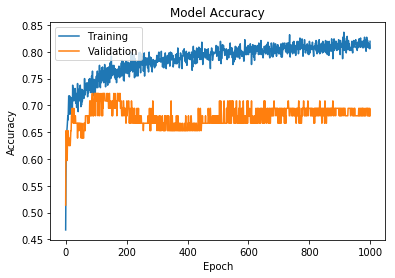

In [97]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

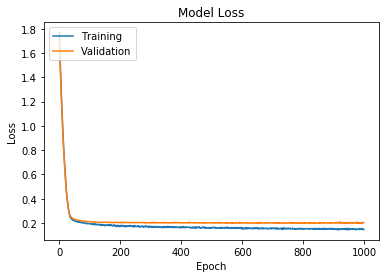

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [99]:
y_pred=model.predict_classes(x_test)
y_test= [int(i) for i in y_test]

In [100]:
y_pred=y_pred.reshape(180)

In [101]:
print("Confusion Matrix")
pd.DataFrame(confusion_matrix(y_test, y_pred),
                   index=['True:yes', 'True: no'],
                   columns=['Pred: yes', 'Pred: no'])

Confusion Matrix


,Pred: yes,Pred: no
True:yes,95,31
True: no,14,40


In [102]:
model.save('model5New.h5')